In [122]:
import numpy as np
import pandas as pd

In [123]:
df=pd.read_csv('banana_quality_dataset.csv')

In [124]:
df.shape

(1000, 16)

In [125]:
#df=df.drop(['harvest_date'],axis=1)

In [126]:
df

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Burro,Ecuador,3.50,Good,4.94,Ripe,21.06,2.49,27.95,196.35,2023-10-04,12.4,409.7,2029.9,173.0
996,997,Cavendish,Philippines,2.38,Processing,6.74,Overripe,16.10,2.00,12.39,165.55,2023-09-23,14.0,314.3,1330.7,180.5
997,998,Plantain,Ecuador,1.68,Processing,1.41,Green,17.17,2.28,16.56,210.08,2023-10-19,18.4,683.0,2955.4,189.9
998,999,Fehi,Guatemala,2.02,Processing,1.34,Green,17.03,2.88,26.31,162.50,2023-09-22,8.2,1362.7,1215.8,85.5


In [127]:
df['quality_category'].value_counts()

quality_category
Processing    506
Good          434
Unripe         35
Premium        25
Name: count, dtype: int64

In [128]:
df.isnull().sum()

sample_id             0
variety               0
region                0
quality_score         0
quality_category      0
ripeness_index        0
ripeness_category     0
sugar_content_brix    0
firmness_kgf          0
length_cm             0
weight_g              0
harvest_date          0
tree_age_years        0
altitude_m            0
rainfall_mm           0
soil_nitrogen_ppm     0
dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sample_id           1000 non-null   int64  
 1   variety             1000 non-null   object 
 2   region              1000 non-null   object 
 3   quality_score       1000 non-null   float64
 4   quality_category    1000 non-null   object 
 5   ripeness_index      1000 non-null   float64
 6   ripeness_category   1000 non-null   object 
 7   sugar_content_brix  1000 non-null   float64
 8   firmness_kgf        1000 non-null   float64
 9   length_cm           1000 non-null   float64
 10  weight_g            1000 non-null   float64
 11  harvest_date        1000 non-null   object 
 12  tree_age_years      1000 non-null   float64
 13  altitude_m          1000 non-null   float64
 14  rainfall_mm         1000 non-null   float64
 15  soil_nitrogen_ppm   1000 non-null   float64
dtypes: floa

In [130]:
df['quality_category'].value_counts()

quality_category
Processing    506
Good          434
Unripe         35
Premium        25
Name: count, dtype: int64

In [131]:
nums_cols=df.select_dtypes(include=['float','int']).columns
nums_cols

Index(['sample_id', 'quality_score', 'ripeness_index', 'sugar_content_brix',
       'firmness_kgf', 'length_cm', 'weight_g', 'tree_age_years', 'altitude_m',
       'rainfall_mm', 'soil_nitrogen_ppm'],
      dtype='object')

<Axes: >

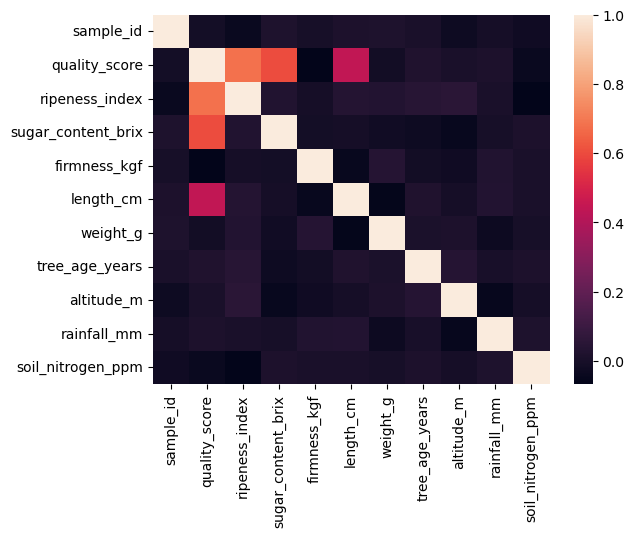

In [139]:
import seaborn as sns
num_cols = df.select_dtypes(include=['int', 'float'])
corr_matrix = num_cols.corr()
corr_matrix
sns.heatmap(data=corr_matrix)

In [11]:
quality_order=[['Unripe','Processing','Good','Premium']]

In [12]:
cat_cols=['variety', 'region', 'ripeness_category']


In [13]:
cat=['quality_category']

In [14]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [15]:
transform=ColumnTransformer(transformers=[("num",StandardScaler(),nums_cols),
                                          ("ord",OrdinalEncoder(categories=quality_order),cat),
                                          ("Cat",OneHotEncoder(sparse_output=False),cat_cols)])


In [16]:
transform

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['sample_id', 'quality_score', 'ripeness_index', 'sugar_content_brix',
       'firmness_kgf', 'length_cm', 'weight_g', 'tree_age_years', 'altitude_m',
       'rainfall_mm', 'soil_nitrogen_ppm'],
      dtype='object')),
                                ('ord',
                                 OrdinalEncoder(categories=[['Unripe',
                                                             'Processing',
                                                             'Good',
                                                             'Premium']]),
                                 ['quality_category']),
                                ('Cat', OneHotEncoder(sparse_output=False),
                                 ['variety', 'region', 'ripeness_category'])])

In [17]:
transform_df=transform.fit_transform(df)

In [18]:
transform_df.shape

(1000, 32)

In [19]:
transform_df

array([[-1.73031962, -1.08235025, -1.10262638, ...,  0.        ,
         0.        ,  1.        ],
       [-1.72685552, -0.08353089,  0.1186018 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.72339142,  2.0435844 ,  1.25422988, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.72339142, -1.45228334, -1.50209355, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.72685552, -0.82339708, -1.54204026, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.73031962,  0.41587878, -0.77163931, ...,  0.        ,
         0.        ,  1.        ]])

In [35]:
dff=pd.read_csv('social_media.csv')

In [36]:
dff

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


In [46]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         30000 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    30000 non-null  float64
 8   actual_productivity_score       30000 non-null  float64
 9   stress_level                    30000 non-null  float64
 10  sleep_hours                     30000 non-null  float64
 11  screen_time_before_sleep        30000 non-null  float64
 12  breaks_during_work              

In [37]:
dff.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

In [62]:
# dff=dff.drop(columns=['gender'],axis=1)

In [61]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   job_type                        30000 non-null  object 
 2   daily_social_media_time         30000 non-null  float64
 3   social_platform_preference      30000 non-null  object 
 4   number_of_notifications         30000 non-null  int64  
 5   work_hours_per_day              30000 non-null  float64
 6   perceived_productivity_score    30000 non-null  float64
 7   actual_productivity_score       30000 non-null  float64
 8   stress_level                    30000 non-null  float64
 9   sleep_hours                     30000 non-null  float64
 10  screen_time_before_sleep        30000 non-null  float64
 11  breaks_during_work              30000 non-null  int64  
 12  uses_focus_apps                 

In [63]:
num_cols=dff.select_dtypes(include=['int','float']).columns

In [64]:
num_cols

Index(['age', 'daily_social_media_time', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work',
       'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
       'weekly_offline_hours', 'job_satisfaction_score'],
      dtype='object')

In [65]:
cat_cols=dff.select_dtypes(include=['object','bool']).columns

In [66]:
cat_cols

Index(['job_type', 'social_platform_preference', 'uses_focus_apps',
       'has_digital_wellbeing_enabled'],
      dtype='object')

In [67]:
num_cols = dff.select_dtypes(include=['int', 'float']).columns
cat_cols = dff.select_dtypes(include=['object','bool']).columns


for num in num_cols:
    if dff[num].mean() == dff[num].median():
        dff[num] = dff[num].fillna(dff[num].mean())
    else:
        dff[num] = dff[num].fillna(dff[num].median())

for cat in cat_cols:
    dff[cat] = dff[cat].fillna(dff[cat].mode()[0])


In [68]:
dff.isnull().sum()

age                               0
job_type                          0
daily_social_media_time           0
social_platform_preference        0
number_of_notifications           0
work_hours_per_day                0
perceived_productivity_score      0
actual_productivity_score         0
stress_level                      0
sleep_hours                       0
screen_time_before_sleep          0
breaks_during_work                0
uses_focus_apps                   0
has_digital_wellbeing_enabled     0
coffee_consumption_per_day        0
days_feeling_burnout_per_month    0
weekly_offline_hours              0
job_satisfaction_score            0
dtype: int64

In [74]:
dff['job_type'].value_counts()

job_type
Education     5055
IT            5026
Finance       5017
Student       5012
Unemployed    4958
Health        4932
Name: count, dtype: int64

In [ ]:
cat=['Health','IT','Finance','Education','Student','Unemployed']

In [ ]:
dff['']

In [ ]:
def column_trransformer(df):
    num_cols = df.select_dtypes(include=['int', 'float']).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    return ColumnTrnasformer(transformers=[("num",StandardScaler(),num_cols),
                                          ("cat",OneHotEncoder(),cat_cols)],
                            remainder="passthrough")

In [73]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [76]:
transform=ColumnTransformer(transformers=[("num",StandardScaler(),num_cols),
                                        ("cat",OneHotEncoder(),cat_cols)],
                           remainder="passthrough")

In [77]:
transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 Index(['age', 'daily_social_media_time', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work',
       'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
       'weekly_offline_hours', 'job_satisfaction_score'],
      dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['job_type', 'social_platform_preference', 'uses_focus_apps',
       'has_digital_wellbeing_enabled'],
      dtype='object'))])

In [78]:
transform_df=transform.fit_transform(dff)

In [79]:
transform_df

array([[ 1.04901651,  0.54404631,  0.13481116, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.32621152,  0.07296357, -0.12413399, ...,  1.        ,
         0.        ,  1.        ],
       [-0.68571545, -0.04018195, -0.38307914, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.03708953,  7.39480535,  0.52322889, ...,  0.        ,
         1.        ,  0.        ],
       [-1.55308142,  0.3496592 , -0.51255172, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.18165053, -0.04018195,  1.30006435, ...,  0.        ,
         0.        ,  1.        ]])

In [80]:
newdf=pd.DataFrame(transform_df)

In [81]:
newdf

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.049017,0.544046,0.134811,-0.118753,1.284994,1.294410,-0.556445,-0.988840,-0.962164,0.947731,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.326212,0.072964,-0.124134,1.090505,-0.227563,0.117999,0.524101,-0.997880,-0.560756,0.632640,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,-0.685715,-0.040182,-0.383079,0.460609,-0.838056,-0.817525,-0.556445,1.488859,-0.635723,-1.572998,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.338138,-0.040182,-0.124134,-0.318248,-1.318396,-1.757555,0.163919,-0.319549,0.286888,-1.257907,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.191679,-0.040182,0.782174,-0.388795,1.705818,-0.000032,0.524101,-0.782171,1.355088,-1.257907,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.541154,-0.621167,-0.124134,1.619644,-1.098820,-0.822083,0.884283,-0.728742,0.617845,1.262822,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29996,-0.179752,0.673962,-1.807277,-1.150287,1.332116,0.944627,0.884283,-2.469131,-1.391799,-0.627725,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29997,0.037090,7.394805,0.523229,1.964378,1.574865,2.050864,-0.196263,-0.720838,0.318305,1.577914,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
29998,-1.553081,0.349659,-0.512552,-0.026722,1.146095,1.075348,0.884283,0.225841,-1.255758,-1.257907,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [91]:
loan=pd.read_csv('loan_approved.csv')

In [92]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [93]:
loan.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [94]:
loan.drop(['Loan_ID','Dependents'],axis=1,inplace=True)

In [96]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  601 non-null    object 
 1   Married                 611 non-null    object 
 2   Education               614 non-null    object 
 3   Self_Employed           582 non-null    object 
 4   ApplicantIncome         614 non-null    int64  
 5   CoapplicantIncome       614 non-null    float64
 6   LoanAmount              592 non-null    float64
 7   Loan_Amount_Term        600 non-null    float64
 8   Credit_History          564 non-null    float64
 9   Property_Area           614 non-null    object 
 10  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [98]:
loan.isnull().sum()

Gender                    13
Married                    3
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [104]:
num_cols=loan.select_dtypes(include=['int','float']).columns

In [105]:
cat_cols=loan.select_dtypes(include=['object']).columns

In [106]:
for num in num_cols:
    if loan[num].mean() == loan[num].median():
        loan[num] = loan[num].fillna(loan[num].mean())
    else:
        loan[num] = loan[num].fillna(loan[num].median())

for cat in cat_cols:
    loan[cat] = loan[cat].fillna(loan[cat].mode()[0])

In [107]:
loan.isnull().sum()

Gender                    0
Married                   0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

In [108]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [115]:
def column_transformer(df):
    num_cols = df.select_dtypes(include=['int', 'float']).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    return ColumnTransformer(transformers=[("num",StandardScaler(),num_cols),
                                          ("cat",OneHotEncoder(),cat_cols)],
                            remainder="passthrough")

In [116]:
transform=column_transformer(loan)

In [119]:
transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object'))])

In [117]:
new_transform=transform.fit_transform(loan)

In [118]:
new_transform

array([[ 0.07299082, -0.55448733, -0.21124125, ...,  1.        ,
         0.        ,  1.        ],
       [-0.13441195, -0.03873155, -0.21124125, ...,  0.        ,
         1.        ,  0.        ],
       [-0.39374734, -0.55448733, -0.94899647, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.43717437, -0.47240418,  1.27616847, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.35706382, -0.55448733,  0.49081614, ...,  1.        ,
         0.        ,  1.        ],
       [-0.13441195, -0.55448733, -0.15174486, ...,  0.        ,
         1.        ,  0.        ]])

In [120]:
new=pd.DataFrame(new_transform)

In [121]:
new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.072991,-0.554487,-0.211241,0.273231,0.411733,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.393747,-0.554487,-0.948996,0.273231,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,-0.462062,0.251980,-0.306435,0.273231,0.411733,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.097728,-0.554487,-0.056551,0.273231,0.411733,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.889500,0.273231,0.411733,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
610,-0.212557,-0.554487,-1.258378,-2.522836,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
611,0.437174,-0.472404,1.276168,0.273231,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
612,0.357064,-0.554487,0.490816,0.273231,0.411733,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
